In [48]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io import img_tiles


extent = [172,179,-42,-34] # North island
print(f'width, height = ({extent[1]-extent[0]}, {extent[3]-extent[2]}) deg')
zoom = 7

extent = [-80,-50,-50,-10] # South America
print(f'width, height = ({extent[1]-extent[0]}, {extent[3]-extent[2]}) deg')
zoom = 4


# NOTE: zoom specifications should be selected based on extent:
# -- 2     = coarse image, select for worldwide or continental scales
# -- 4-6   = medium coarseness, select for countries and larger states
# -- 6-10  = medium fineness, select for smaller states, regions, and cities
# -- 10-12 = fine image, select for city boundaries and zip codes
# -- 14+   = extremely fine image, select for roads, blocks, buildings
# max 19

width, height = (7, 8) deg
width, height = (30, 40) deg


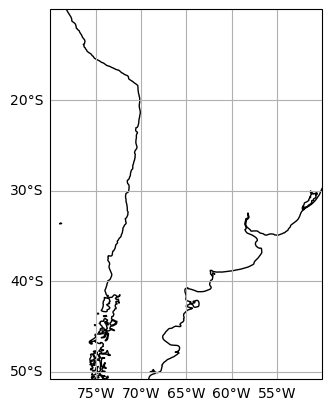

In [49]:
# simple

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent(extent)
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False


Text(0.5, 1.0, 'stock_img')

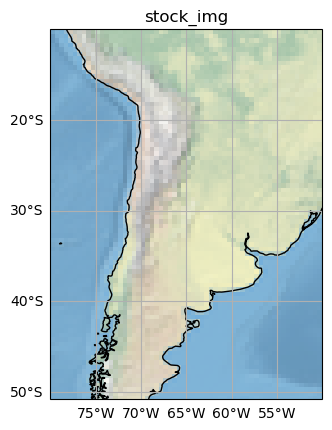

In [50]:
# stock_img

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent(extent)
ax.stock_img()
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.set_title('stock_img')

Text(0.5, 1.0, 'GoogleTiles - street')

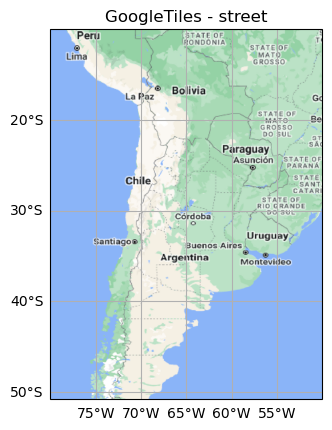

In [51]:
# GoogleTiles Street

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent(extent)
ax.add_image(img_tiles.GoogleTiles(style='street'),zoom)
# ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.set_title('GoogleTiles - street')


Text(0.5, 1.0, 'GoogleTiles  - satellite')

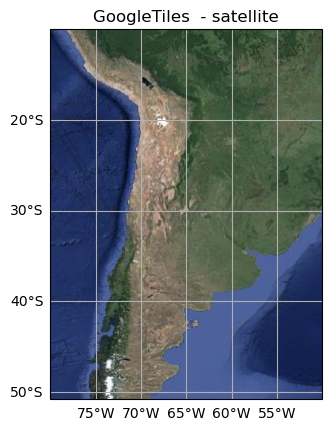

In [52]:
# GoogleTiles satellite

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent(extent)
ax.add_image(img_tiles.GoogleTiles(style='satellite'),zoom)
# ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.set_title('GoogleTiles  - satellite')


Text(0.5, 1.0, 'GoogleTiles - Terrain')

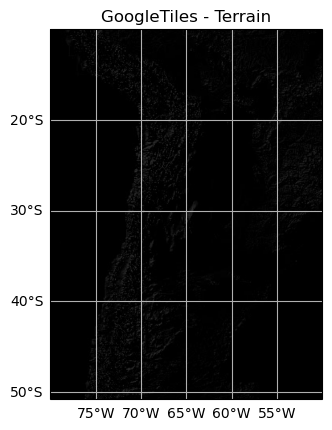

In [53]:
# GoogleTiles terrain - all black!

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent(extent)
ax.add_image(img_tiles.GoogleTiles(style='terrain'),zoom)
# ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.set_title('GoogleTiles - Terrain')


Text(0.5, 1.0, 'OSM')

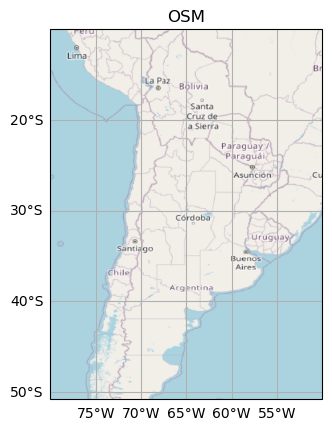

In [54]:
# OSM

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent(extent)
ax.add_image(img_tiles.OSM(),zoom)
# ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.set_title('OSM')


Text(0.5, 1.0, 'spoofed OSM')

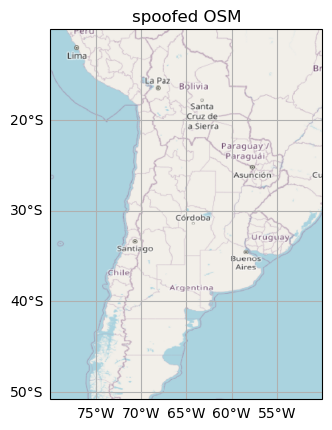

In [55]:
#https://stackoverflow.com/questions/77248120/stamen-terrain-map-not-working-in-cartopy

def image_spoof(self, tile):

    import io
    from urllib.request import urlopen, Request
    from PIL import Image

    url = self._image_url(tile) # get the url of the street map API
    req = Request(url) # start request
    req.add_header('User-agent','Anaconda 3')
    fh = urlopen(req)
    im_data = io.BytesIO(fh.read())
    fh.close()
    img = Image.open(im_data)
    img = img.convert(self.desired_tile_form) # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

img_tiles.OSM.get_image = image_spoof # reformat web request for street map spoofing
tile_image = img_tiles.OSM() # spoofed, downloaded street map

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent(extent)
ax.add_image(tile_image,zoom)
# ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.set_title('spoofed OSM')


Text(0.5, 1.0, 'spoofed QuadtreeTiles')

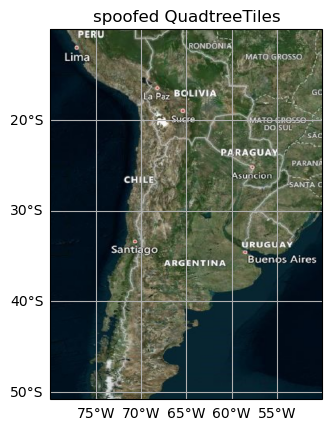

In [56]:
img_tiles.QuadtreeTiles.get_image = image_spoof # reformat web request for street map spoofing
tile_image = img_tiles.QuadtreeTiles() # spoofed, downloaded street map

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent(extent)
ax.add_image(tile_image,zoom)
# ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.set_title('spoofed QuadtreeTiles')

Text(0.5, 1.0, 'spoofed StadiaMapsTiles - alidade_smooth')

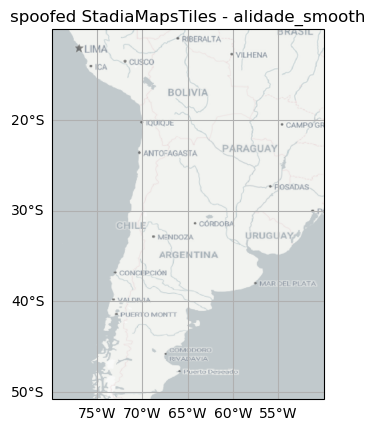

In [57]:
img_tiles.StadiaMapsTiles.get_image = image_spoof # reformat web request for street map spoofing
tile_image = img_tiles.StadiaMapsTiles(style='alidade_smooth', apikey='3f2c1505-df0e-4ac6-940c-83febd5cd7c5') # spoofed, downloaded street map

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent(extent)
ax.add_image(tile_image,zoom)
# ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.set_title('spoofed StadiaMapsTiles - alidade_smooth')


Text(0.5, 1.0, 'spoofed StadiaMapsTiles - stamen_terrain')

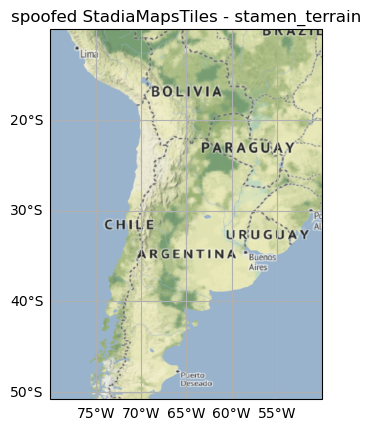

In [61]:
img_tiles.StadiaMapsTiles.get_image = image_spoof #
tile_image = img_tiles.StadiaMapsTiles(style='stamen_terrain', apikey='3f2c1505-df0e-4ac6-940c-83febd5cd7c5') # spoofed, downloaded street map

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent(extent)
ax.add_image(tile_image,zoom)
# ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.set_title('spoofed StadiaMapsTiles - stamen_terrain')

Text(0.5, 1.0, 'spoofed StadiaMapsTiles - osm_bright')

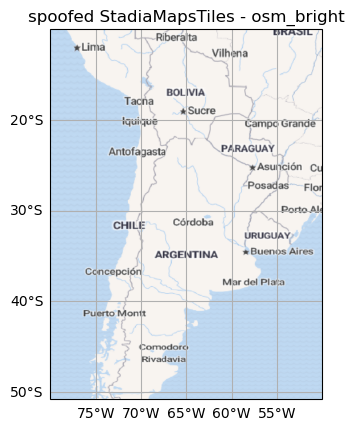

In [59]:
img_tiles.StadiaMapsTiles.get_image = image_spoof #
tile_image = img_tiles.StadiaMapsTiles(style='osm_bright', apikey='3f2c1505-df0e-4ac6-940c-83febd5cd7c5') # spoofed, downloaded street map

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent(extent)
ax.add_image(tile_image,zoom)
# ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.set_title('spoofed StadiaMapsTiles - osm_bright')

In [60]:
# or a full reference on the styles available please see
# https://docs.stadiamaps.com/themes/.

